In [19]:
import requests

In [20]:
import lxml.html

In [21]:
reviews = []

url = 'http://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=123519&type=before'

for page in range(100, 500):
    res = requests.get(url.format(page))
    element = lxml.html.fromstring(res.text)
    for e in element.xpath('.//div[@class="score_result"]//li'):
        star = e.find('.//div[@class="star_score"]//em').text_content()
        comment = e.find('.//div[@class="score_reple"]//p').text_content()
        reviews.append([star, comment[3:]])

In [22]:
import csv
with open('review_before_The Handmaiden.csv', 'w', encoding='utf8') as f:
    w = csv.writer(f)
    w.writerow(['star', 'comment'])
    w.writerows(reviews)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
from konlpy.tag import Twitter

In [25]:
tagger = Twitter()

In [26]:
def get_word(text):
    nouns = tagger.nouns(text)
    return [noun for noun in nouns if len(noun) > 1]

In [27]:
cv = CountVectorizer(tokenizer=get_word, max_features=1000)

In [28]:
tdm = cv.fit_transform([r[1] for r in reviews])

In [29]:
noun_list = cv.get_feature_names()

In [30]:
import numpy

In [31]:
numpy.save('tdm.npy', tdm)

In [35]:
with open('nouns_before_The Handmaiden.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(noun_list))

In [36]:
tdm = numpy.load('tdm.npy').tolist()

In [37]:
with open('nouns_before_The Handmaiden.txt', encoding='utf8') as f:
    noun_list = f.read().splitlines()

In [38]:
from sklearn.cross_validation import train_test_split

In [39]:
stars = [int(r[0]) for r in reviews]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(tdm, stars, test_size=0.2, random_state=42)

In [41]:
from sklearn import linear_model

In [42]:
lm = linear_model.LinearRegression()

In [43]:
lm.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
import operator

In [45]:
def get_important_words(model, positive=True, n=8):
    return sorted(list(zip(noun_list, model.coef_)), key=operator.itemgetter(1), reverse=positive)[:n]

In [46]:
get_important_words(lm)

[('대감', 0.20249999999999987),
 ('배우', 0.20249999999999987),
 ('폭발', 0.20249999999999987),
 ('하정우', 0.20249999999999987),
 ('확정', 0.20249999999999987),
 ('박찬욱', 0.18909458834413007),
 ('원작', 0.18909458834413007),
 ('스미스', 0.15500231267346601)]

In [47]:
get_important_words(lm,False)

[('동성애', -0.45352451433855617),
 ('여성', -0.30234967622570325),
 ('가치', -0.15117483811285162),
 ('광고', -0.15117483811285162),
 ('남성', -0.15117483811285162),
 ('노리개', -0.15117483811285162),
 ('당시', -0.15117483811285162),
 ('대한', -0.15117483811285162)]

In [48]:
lm.score(X_train, y_train)

1.0

In [49]:
lm.score(X_test, y_test)

1.0

In [94]:
reviews = []

url = 'http://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=123519&type=after'

for page in range(100, 500):
    res = requests.get(url.format(page))
    element = lxml.html.fromstring(res.text)
    for e in element.xpath('.//div[@class="score_result"]//li'):
        star = e.find('.//div[@class="star_score"]//em').text_content()
        comment = e.find('.//div[@class="score_reple"]//p').text_content()
        reviews.append([star, comment[3:]])

In [95]:
import csv
with open('review_after_The Handmaiden.csv', 'w', encoding='utf8') as f:
    w = csv.writer(f)
    w.writerow(['star', 'comment'])
    w.writerows(reviews)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
from konlpy.tag import Twitter

In [58]:
tagger = Twitter()

In [59]:
cv = CountVectorizer(tokenizer=get_word, max_features=1000)

In [60]:
tdm = cv.fit_transform([r[1] for r in reviews])

In [61]:
noun_list = cv.get_feature_names()

In [62]:
numpy.save('tdm.npy', tdm)

In [63]:
with open('nouns_after_The Handmaiden.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(noun_list))

In [64]:
tdm = numpy.load('tdm.npy').tolist()

In [65]:
with open('nouns_after_The Handmaiden.txt', encoding='utf8') as f:
    noun_list = f.read().splitlines()

In [66]:
stars = [int(r[0]) for r in reviews]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(tdm, stars, test_size=0.2, random_state=42)

In [68]:
from sklearn import linear_model

In [69]:
lm = linear_model.LinearRegression()

In [70]:
lm.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
def get_important_words(model, positive=True, n=8):
    return sorted(list(zip(noun_list, model.coef_)), key=operator.itemgetter(1), reverse=positive)[:n]

In [72]:
get_important_words(lm)

[('하정우', 0.38062500000000027),
 ('김태', 0.34515625000000177),
 ('리라', 0.34515625000000177),
 ('신인', 0.34515625000000177),
 ('정말', 0.34515625000000177),
 ('관람객', 0.076124999999999207),
 ('구원', 0.076124999999999207),
 ('마코', 0.076124999999999207)]

In [73]:
get_important_words(lm,False)

[('미술감독', -1.6193749999999998),
 ('정사', -0.058988095238130513),
 ('굴곡', -0.029494047619065256),
 ('남성', -0.029494047619065256),
 ('내부', -0.029494047619065256),
 ('달리', -0.029494047619065256),
 ('당시', -0.029494047619065256),
 ('라인', -0.029494047619065256)]

In [1]:
import requests
import lxml.html
import csv

In [6]:
url = 'http://news.naver.com/main/search/search.nhn?query=%BF%B5%C8%AD+%BE%C6%B0%A1%BE%BE&ie=MS949&x=0&y=0&page={}'

In [7]:
with open('news_The Handmaiden.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    for i in range(1, 21):
        res = requests.get(url.format(i))  # 기사 목록
        element = lxml.html.fromstring(res.text)
        for news_link in element.xpath('.//a[@class="go_naver"]'):
            try:
                res = requests.get(news_link.attrib['href'])   # 네이버 뉴스 링크
                news = lxml.html.fromstring(res.text)
                body = news.xpath('.//div[@id="articleBodyContents"]')[0]
                writer.writerow([body.text_content()])
            except:
                continue

In [8]:
news = []
with open('news_The Handmaiden.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

In [9]:
news[0]

'\r\r\n\t\r\r\n\t\r\r\n\t[한국경제TV 트렌드연예팀 조은애 기자]영화 \'아가씨\'에서 히데코의 어린 시절을 연기한 아역 배우 조은형이 주목받고 있다.\'아가씨\'는 1930년대 일제강점기 조선, 막대한 재산을 상속받게 된 귀족 아가씨와 아가씨의 재산을 노리는 백작, 그리고 백작에게 거래를 제안받은 하녀와 아가씨의 후견인까지, 돈과 마음을 뺏기 위해 서로 속고 속이는 인물들의 이야기를 그린 작품.극중 귀족 아가씨 히데코의 어린 시절을 연기한 아역 배우 조은형이 나이답지 않은 뛰어난 연기력으로 관객들의 호평을 이끌어내고 있다.조은형은 부모를 잃고 후견인 코우즈키의 저택에 들어온 후 낯선 환경에서 느끼는 불안함과 외로움을 섬세하게 표현해냈다. 이에 회상신 만으로도 강렬한 존재감을 뿜어내며 깊은 인상을 심어준다.특히 후견인 코우즈키에게 억압 당하는 모습, 코우즈키가 없는 곳에서 날카롭게 돌변하는 어린 히데코의 모습을 탁월하게 소화해낸 그의 연기는 긴장감을 배가시킨다.박찬욱 감독은 "조은형은 대단한 배우다. 기존 시나리오에는 어린 히데코의 나이가 5세, 8세, 10세 이렇게 세 연령대였으나 오디션 과정에서 조은형 배우의 연기를 본 후 혼자 모든 연령층의 연기를 다 해도 될 것 같다는 확신이 들었다"고 극찬했다. 배우 김민희 역시 "히데코의 어린 시절을 정말 잘 소화해줬다. 영화를 보고 난 후 중요한 역할을 잘 해내 준 조은형 배우에게 정말 고마웠다"고 전해 눈길을 모았다.한편 \'아가씨\'는 전국 극장가에서 상영 중이다.(사진=CJ엔터테인먼트)트렌드연예팀 조은애기자 eun@wowtv.co.kr[핫!영상] 야구공이 탄생하는 과정 `정말 신기해`[핫!영상] 잡고말테야...[핫!영상] 영하 40도의 위력은 어느 정도?[핫!영상] 코브라가 주인한테 대들때 주인의 반응 `폭소`ⓒ 한국경제TV, 무단 전재 및 재배포 금지\r\r\n\t\r\r\n\t'

In [10]:
from konlpy.tag import Twitter
tagger = Twitter()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [13]:
tdf = cv.fit_transform(news)

In [14]:
tdf
tdf.todense

<bound method spmatrix.todense of <19x50 sparse matrix of type '<class 'numpy.int64'>'
	with 452 stored elements in Compressed Sparse Row format>>

In [15]:
words = cv.get_feature_names()

In [16]:
words

['감독',
 '개',
 '개봉',
 '것',
 '경제',
 '고',
 '공개',
 '관객',
 '그',
 '금지',
 '기자',
 '년',
 '뉴스',
 '다운로드',
 '돌파',
 '등',
 '때',
 '를',
 '만',
 '며',
 '명',
 '무단',
 '박찬욱',
 '배우',
 '배포',
 '사람',
 '사진',
 '소설',
 '속',
 '수',
 '스크린',
 '아가씨',
 '연기',
 '영상',
 '영화',
 '원작',
 '위',
 '의',
 '의상',
 '이',
 '이야기',
 '일',
 '재',
 '전재',
 '조',
 '조진웅',
 '하나',
 '하정우',
 '핫',
 '흥행']

In [17]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [18]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [19]:
tdf = cv.fit_transform(news)

In [20]:
words = cv.get_feature_names()

In [21]:
words

['감독',
 '개봉',
 '경제',
 '고객',
 '공개',
 '관객',
 '그때',
 '금지',
 '기자',
 '김민희',
 '뉴스',
 '다운로드',
 '데코',
 '돌파',
 '마음',
 '무단',
 '바흐',
 '박찬욱',
 '배우',
 '배포',
 '보이',
 '부분',
 '사냥',
 '사람',
 '사진',
 '소설',
 '스미스',
 '스크린',
 '아가씨',
 '연기',
 '영상',
 '영화',
 '원작',
 '위해',
 '의상',
 '이야기',
 '인기',
 '일본',
 '작품',
 '전재',
 '조진웅',
 '캐릭터',
 '콘텐츠',
 '트렌드',
 '포스터',
 '핑거',
 '하나',
 '하정우',
 '한국',
 '흥행']

In [22]:
import numpy

In [23]:
count_mat = tdf.sum(axis=0)

In [24]:
count_mat

matrix([[ 45,  23,  16,  10,  13,  19,   8,  15,  15,  11,  13,  14,   9,
          12,   9,  15,   9,  27,  12,  15,   9,  10,  10,  16,  12,  14,
          10,  18,  63,  11,  19, 100,  19,   8,  13,  27,  10,  10,   9,
          15,  20,   9,   9,   8,  10,  10,  22,  19,   9,  12]], dtype=int64)

In [25]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [26]:
count

array([ 45,  23,  16,  10,  13,  19,   8,  15,  15,  11,  13,  14,   9,
        12,   9,  15,   9,  27,  12,  15,   9,  10,  10,  16,  12,  14,
        10,  18,  63,  11,  19, 100,  19,   8,  13,  27,  10,  10,   9,
        15,  20,   9,   9,   8,  10,  10,  22,  19,   9,  12], dtype=int64)

In [27]:
word_count = list(zip(words, count))

In [28]:
word_count

[('감독', 45),
 ('개봉', 23),
 ('경제', 16),
 ('고객', 10),
 ('공개', 13),
 ('관객', 19),
 ('그때', 8),
 ('금지', 15),
 ('기자', 15),
 ('김민희', 11),
 ('뉴스', 13),
 ('다운로드', 14),
 ('데코', 9),
 ('돌파', 12),
 ('마음', 9),
 ('무단', 15),
 ('바흐', 9),
 ('박찬욱', 27),
 ('배우', 12),
 ('배포', 15),
 ('보이', 9),
 ('부분', 10),
 ('사냥', 10),
 ('사람', 16),
 ('사진', 12),
 ('소설', 14),
 ('스미스', 10),
 ('스크린', 18),
 ('아가씨', 63),
 ('연기', 11),
 ('영상', 19),
 ('영화', 100),
 ('원작', 19),
 ('위해', 8),
 ('의상', 13),
 ('이야기', 27),
 ('인기', 10),
 ('일본', 10),
 ('작품', 9),
 ('전재', 15),
 ('조진웅', 20),
 ('캐릭터', 9),
 ('콘텐츠', 9),
 ('트렌드', 8),
 ('포스터', 10),
 ('핑거', 10),
 ('하나', 22),
 ('하정우', 19),
 ('한국', 9),
 ('흥행', 12)]

In [29]:
import operator

In [30]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('영화', 100),
 ('아가씨', 63),
 ('감독', 45),
 ('박찬욱', 27),
 ('이야기', 27),
 ('개봉', 23),
 ('하나', 22),
 ('조진웅', 20),
 ('관객', 19),
 ('영상', 19),
 ('원작', 19),
 ('하정우', 19),
 ('스크린', 18),
 ('경제', 16),
 ('사람', 16),
 ('금지', 15),
 ('기자', 15),
 ('무단', 15),
 ('배포', 15),
 ('전재', 15),
 ('다운로드', 14),
 ('소설', 14),
 ('공개', 13),
 ('뉴스', 13),
 ('의상', 13),
 ('돌파', 12),
 ('배우', 12),
 ('사진', 12),
 ('흥행', 12),
 ('김민희', 11),
 ('연기', 11),
 ('고객', 10),
 ('부분', 10),
 ('사냥', 10),
 ('스미스', 10),
 ('인기', 10),
 ('일본', 10),
 ('포스터', 10),
 ('핑거', 10),
 ('데코', 9),
 ('마음', 9),
 ('바흐', 9),
 ('보이', 9),
 ('작품', 9),
 ('캐릭터', 9),
 ('콘텐츠', 9),
 ('한국', 9),
 ('그때', 8),
 ('위해', 8),
 ('트렌드', 8)]

In [31]:
%matplotlib inline

In [32]:
from wordcloud import WordCloud

In [33]:
from matplotlib import pyplot

In [34]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='black', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

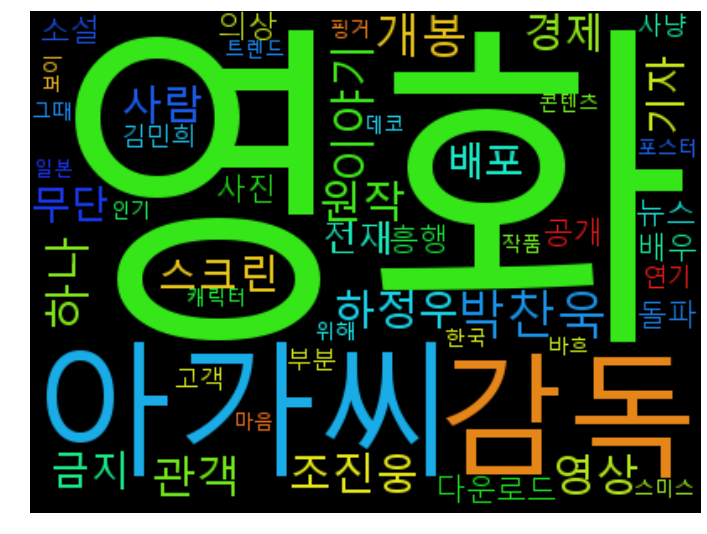

In [35]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()